https://www.kaggle.com/datasets/pratyushpuri/sports-betting-predictive-analysis-dataset

## 1. Dataset Information

This comprehensive synthetic dataset contains 1,369 rows and 10 columns specifically designed for predictive modeling in sports betting analytics. The dataset provides a rich foundation for machine learning applications in the sports betting domain, featuring realistic match data across multiple sports with comprehensive betting odds, team information, and outcome predictions.

## 2. Exploratory Data Analysis

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글꺠짐방지
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [28]:
df = pd.read_csv("G:\내 드라이브\DArtB\Kaggle Study\Sports_Betting_Predictive_Analysis\sports_betting_predictive_analysis.csv")

In [29]:
df.head()

,Match_ID,Date,Sport,Home_Team,Away_Team,Home_Team_Odds,Away_Team_Odds,Draw_Odds,Predicted_Winner,Actual_Winner
0,M00001,2024-01-24,Basketball,Gonzalezmouth Tigers,Hernandezfurt Lions,3.62,3.99,NaN,Hernandezfurt Lions,Hernandezfurt Lions
1,M00002,2025-05-03,Basketball,Rothstad Wolves,North Manuel Eagles,1.84,NaN,NaN,Rothstad Wolves,Rothstad Wolves
2,M00003,2025-04-10,Baseball,Aliciaport Lions,West Gabrielton Lions,3.93,3.29,NaN,Aliciaport Lions,Aliciaport Lions
3,M00004,2024-08-02,Tennis,Lake Samantha Eagles,Simonshire Lions,3.70,3.61,NaN,Simonshire Lions,Lake Samantha Eagles
4,M00005,2024-10-05,Tennis,Brendanport Eagles,Williamsfurt Bears,2.26,2.52,NaN,Williamsfurt Bears,Brendanport Eagles


In [30]:
df.shape

(1369, 10)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369 entries, 0 to 1368
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Match_ID          1369 non-null   object 
 1   Date              1369 non-null   object 
 2   Sport             1369 non-null   object 
 3   Home_Team         1369 non-null   object 
 4   Away_Team         1369 non-null   object 
 5   Home_Team_Odds    1298 non-null   float64
 6   Away_Team_Odds    1282 non-null   float64
 7   Draw_Odds         498 non-null    float64
 8   Predicted_Winner  1369 non-null   object 
 9   Actual_Winner     1369 non-null   object 
dtypes: float64(3), object(7)
memory usage: 107.1+ KB


In [32]:
df.describe()

,Home_Team_Odds,Away_Team_Odds,Draw_Odds
count,1298.000000,1282.000000,498.000000
mean,3.069823,3.060031,3.103012
std,1.096600,1.087785,1.098248
min,1.200000,1.210000,1.200000
25%,2.110000,2.130000,2.142500
50%,3.080000,2.995000,3.160000
75%,3.980000,4.017500,4.062500
max,4.980000,5.000000,4.990000


In [33]:
df.isnull().sum()

Match_ID              0
Date                  0
Sport                 0
Home_Team             0
Away_Team             0
Home_Team_Odds       71
Away_Team_Odds       87
Draw_Odds           871
Predicted_Winner      0
Actual_Winner         0
dtype: int64

In [34]:
df['Sport'].value_counts()

Sport
Basketball    292
Tennis        278
Baseball      271
Football      270
Hockey        258
Name: count, dtype: int64

In [35]:
df.columns

Index(['Match_ID', 'Date', 'Sport', 'Home_Team', 'Away_Team', 'Home_Team_Odds',
       'Away_Team_Odds', 'Draw_Odds', 'Predicted_Winner', 'Actual_Winner'],
      dtype='object')

### 2-1. EDA through visualization

C:\Users\luke\AppData\Local\Temp\ipykernel_50220\58529365.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_counts.index, y=sport_counts.values, palette='viridis')


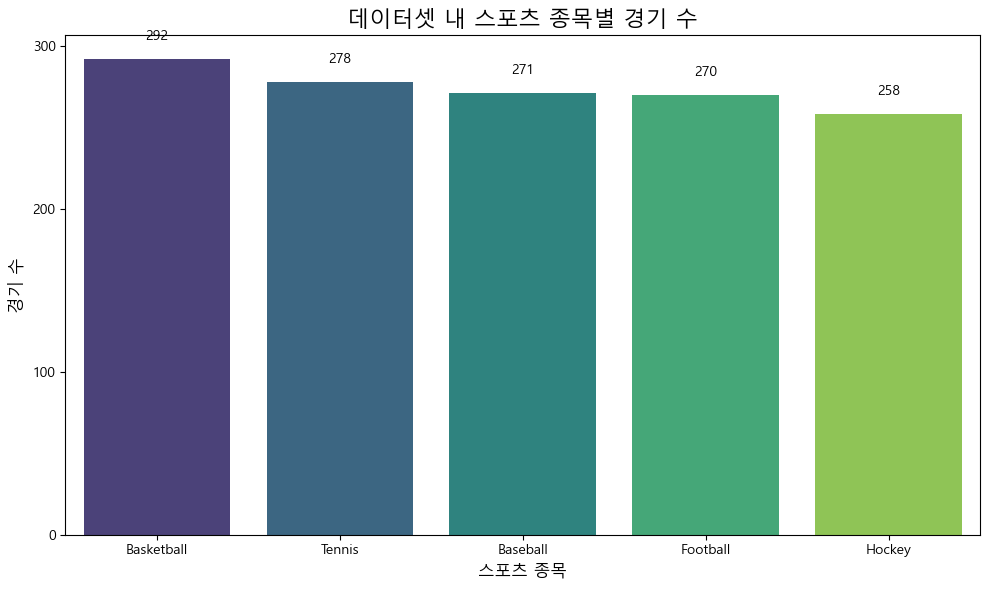

In [36]:
# df['Sport'] 컬럼의 각 고유값(스포츠 종목)의 빈도수를 계산합니다.
sport_counts = df['Sport'].value_counts()

# 막대 그래프를 그립니다.
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
sns.barplot(x=sport_counts.index, y=sport_counts.values, palette='viridis')

# 그래프 제목과 축 라벨 설정
plt.title('데이터셋 내 스포츠 종목별 경기 수', fontsize=16)
plt.xlabel('스포츠 종목', fontsize=12)
plt.ylabel('경기 수', fontsize=12)

# Y축의 값을 정수형으로 표시 (경기 수는 정수이므로)
plt.yticks(np.arange(0, max(sport_counts.values) + 100, 100)) # 0부터 최대값까지 100 단위로 눈금 설정
plt.ticklabel_format(style='plain', axis='y') # 지수 표기법 방지

# 각 막대 위에 정확한 경기 수 표시
for index, value in enumerate(sport_counts.values):
    plt.text(index, value + 10, str(value), ha='center', va='bottom', fontsize=10) # 막대 위에 텍스트 추가

plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.show() # 그래프 표시

In [37]:
accuracy = (df['Predicted_Winner'] == df['Actual_Winner']).mean() * 100
print(f"Prediction Accuracy: {accuracy:.2f}%")

Prediction Accuracy: 43.97%


C:\Users\luke\AppData\Local\Temp\ipykernel_50220\3238117123.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sport_accuracy_series.index, y=sport_accuracy_series.values, palette='coolwarm')


스포츠 종목별 예측 정확도:
------------------------------
Basketball: 51.71%
Baseball: 52.77%
Tennis: 47.84%
Hockey: 31.78%
Football: 34.44%
------------------------------


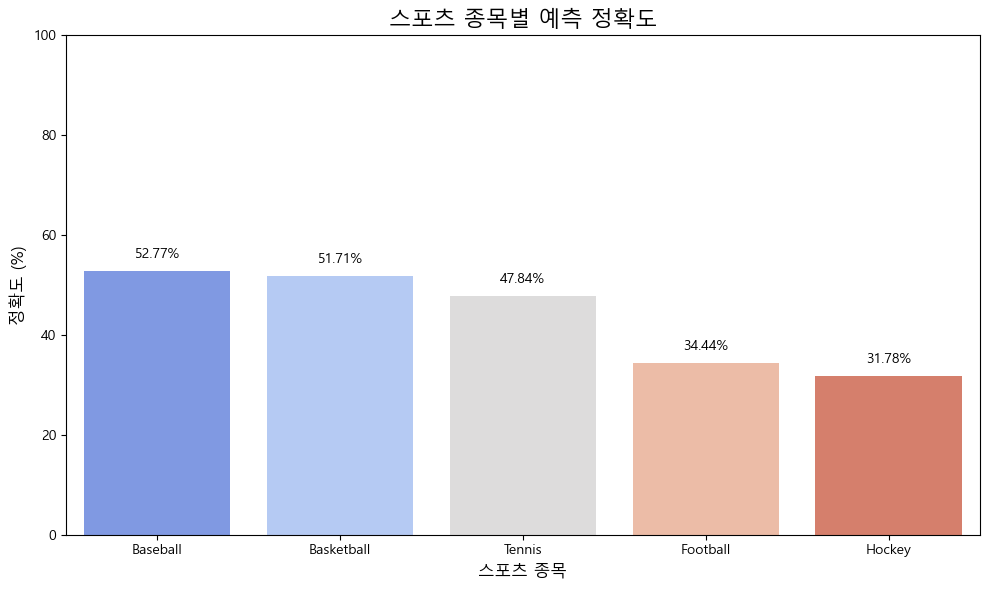

In [38]:
# 스포츠 종목별 정확도를 저장할 딕셔너리 초기화
sport_accuracy = {}

# 'Sport' 컬럼의 고유한 값(즉, 각 스포츠 종목)들을 가져옵니다.
unique_sports = df['Sport'].unique()

print("스포츠 종목별 예측 정확도:")
print("-" * 30)

# 각 스포츠 종목에 대해 반복합니다.
for sport in unique_sports:
    # 현재 스포츠 종목에 해당하는 데이터만 필터링합니다.
    df_sport = df[df['Sport'] == sport]

    # 해당 스포츠 종목 내에서 'Predicted_Winner'와 'Actual_Winner'가 일치하는 비율을 계산합니다.
    # (df_sport['Predicted_Winner'] == df_sport['Actual_Winner'])는 True/False 시리즈를 반환하고,
    # .mean()은 True(1)의 비율을 계산하여 정확도를 얻습니다.
    accuracy = (df_sport['Predicted_Winner'] == df_sport['Actual_Winner']).mean() * 100

    # 결과를 딕셔너리에 저장하고 출력합니다.
    sport_accuracy[sport] = accuracy
    print(f"{sport}: {accuracy:.2f}%")

print("-" * 30)

# (옵션) 스포츠 종목별 정확도를 시각화하여 비교하기 쉽게 할 수도 있습니다.
# 위에서 구한 sport_accuracy 딕셔너리를 Pandas Series로 변환
sport_accuracy_series = pd.Series(sport_accuracy).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sport_accuracy_series.index, y=sport_accuracy_series.values, palette='coolwarm')
plt.title('스포츠 종목별 예측 정확도', fontsize=16)
plt.xlabel('스포츠 종목', fontsize=12)
plt.ylabel('정확도 (%)', fontsize=12)
plt.ylim(0, 100) # 정확도는 0에서 100 사이이므로 y축 범위 설정

# 각 막대 위에 정확도 값 표시
for index, value in enumerate(sport_accuracy_series.values):
    plt.text(index, value + 2, f"{value:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

- Football과 Hockey에서만 무승부 존재 -> 예측 정확도가 떨어지는 원인일지도

#### 결측치 분석

In [39]:
# 'Home_Team_Odds' 컬럼에서 NaN 값의 개수를 계산합니다.
nan_count = df['Home_Team_Odds'].isna().sum()

print(f"Home_Team_Odds 컬럼에 NaN 값이 있는 행의 수: {nan_count}개\n")

# 'Home_Team_Odds' 컬럼이 NaN인 행들만 필터링하여 새로운 데이터프레임을 생성합니다.
Home_Team_Odds_NaN = df[df['Home_Team_Odds'].isna()].copy()

print("Home_Team_Odds_NaN 데이터프레임의 상위 5개 행:")
print(Home_Team_Odds_NaN.head())

# (옵션) 새로운 데이터프레임의 정보 확인
# print("\nHome_Team_Odds_NaN 데이터프레임 정보:")
# Home_Team_Odds_NaN.info()

Home_Team_Odds 컬럼에 NaN 값이 있는 행의 수: 71개

Home_Team_Odds_NaN 데이터프레임의 상위 5개 행:
   Match_ID        Date       Sport                 Home_Team  \
45   M00046  2024-07-18      Hockey  North Autumnville Eagles   
55   M00056  2025-07-05  Basketball          Cooperview Bears   
59   M00060  2024-01-25    Baseball         Port Cheryl Lions   
67   M00068  2023-08-27      Tennis        Chelseaview Eagles   
70   M00071  2025-02-19    Baseball           Martinton Lions   

                 Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
45        Scottshire Bears             NaN            2.30       4.69   
55         Davisfurt Lions             NaN            4.66        NaN   
59      Schwartzfort Bears             NaN            2.56        NaN   
67    Michellemouth Tigers             NaN             NaN        NaN   
70  Port Deannastad Eagles             NaN            2.35        NaN   

          Predicted_Winner         Actual_Winner  
45        Scottshire Bears                 

In [40]:
# 'Away_Team_Odds' 컬럼에서 NaN 값의 개수를 계산합니다.
nan_count = df['Away_Team_Odds'].isna().sum()

print(f"Away_Team_Odds 컬럼에 NaN 값이 있는 행의 수: {nan_count}개\n")

# 'Away_Team_Odds' 컬럼이 NaN인 행들만 필터링하여 새로운 데이터프레임을 생성합니다.
Away_Team_Odds_NaN = df[df['Away_Team_Odds'].isna()].copy()

print("Away_Team_Odds_NaN 데이터프레임의 상위 5개 행:")
print(Away_Team_Odds_NaN.head())

# (옵션) 새로운 데이터프레임의 정보 확인
# print("\nAway_Team_Odds_NaN 데이터프레임 정보:")
# Away_Team_Odds_NaN.info()

Away_Team_Odds 컬럼에 NaN 값이 있는 행의 수: 87개

Away_Team_Odds_NaN 데이터프레임의 상위 5개 행:
   Match_ID        Date       Sport             Home_Team  \
1    M00002  2025-05-03  Basketball       Rothstad Wolves   
19   M00020  2024-03-19    Baseball    Cameronberg Wolves   
67   M00068  2023-08-27      Tennis    Chelseaview Eagles   
74   M00075  2023-08-19    Baseball        Choiport Lions   
96   M00097  2024-01-10  Basketball  Valenciamouth Eagles   

                    Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
1         North Manuel Eagles            1.84             NaN        NaN   
19          Paulamouth Eagles            4.81             NaN        NaN   
67       Michellemouth Tigers             NaN             NaN        NaN   
74         North Andrew Bears            4.77             NaN        NaN   
96  East Williamborough Bears            2.09             NaN        NaN   

        Predicted_Winner              Actual_Winner  
1        Rothstad Wolves            Rothstad W

In [41]:
# Filter the DataFrame for 'Football' and 'Hockey' sports
df_football_hockey = df[df['Sport'].isin(['Football', 'Hockey'])]

# Count NaN values in 'Draw_Odds' for the filtered DataFrame
draw_odds_nan_count = df_football_hockey['Draw_Odds'].isna().sum()

print(f"Football and Hockey 종목에서 Draw_Odds 컬럼에 NaN 값이 있는 행의 수: {draw_odds_nan_count}개\n")

# Create a new DataFrame with rows where 'Sport' is Football or Hockey AND 'Draw_Odds' is NaN
Draw_Odds_NaN = df_football_hockey[df_football_hockey['Draw_Odds'].isna()].copy()

print("Draw_Odds_NaN 데이터프레임의 상위 5개 행:")
print(Draw_Odds_NaN.head())

# (Optional) Print the shape of the new DataFrame to confirm the number of rows and columns
# print(f"\nDraw_Odds_NaN 데이터프레임의 형태: {Draw_Odds_NaN.shape}")

# (Optional) Check the 'Sport' values in the new DataFrame to confirm the filter
# print("\nDraw_Odds_NaN 데이터프레임의 Sport 컬럼 고유값:")
# print(Draw_Odds_NaN['Sport'].unique())

# (Optional) Check for NaN values in 'Draw_Odds' within the new DataFrame
# print("\nDraw_Odds_NaN 데이터프레임의 Draw_Odds NaN 값 확인:")
# print(Draw_Odds_NaN['Draw_Odds'].isna().sum())

Football and Hockey 종목에서 Draw_Odds 컬럼에 NaN 값이 있는 행의 수: 30개

Draw_Odds_NaN 데이터프레임의 상위 5개 행:
    Match_ID        Date     Sport          Home_Team  \
20    M00021  2024-09-16  Football  Camposville Bears   
165   M00166  2024-07-06    Hockey   Port Lisa Wolves   
178   M00179  2023-08-08    Hockey  Michaelland Bears   
191   M00192  2024-03-13  Football   Karenburgh Bears   
261   M00262  2025-07-07  Football  South John Tigers   

                      Away_Team  Home_Team_Odds  Away_Team_Odds  Draw_Odds  \
20   Lake Kimberlychester Lions            3.40            1.52        NaN   
165            New Brett Tigers             NaN            4.15        NaN   
178          Port Debbie Tigers            4.18            2.43        NaN   
191   South Robertchester Lions            1.21             NaN        NaN   
261            Rosemouth Wolves            1.53            2.73        NaN   

              Predicted_Winner               Actual_Winner  
20           Camposville Bears  Lake

In [42]:
# 'Predicted_Winner'가 'Draw'이거나 'Actual_Winner'가 'Draw'인 행들을 필터링합니다.
draw_matches = df[(df['Predicted_Winner'] == 'Draw') | (df['Actual_Winner'] == 'Draw')].copy()

print("Predicted_Winner 또는 Actual_Winner가 'Draw'인 경기들:")
print(draw_matches.head())

# (옵션) 필터링된 데이터프레임의 크기 확인
print(f"\n'Draw' 결과가 포함된 총 경기 수: {len(draw_matches)}개")

# (옵션) 'Draw' 결과가 포함된 경기들의 Sport 분포 확인
print("\n'Draw' 결과가 포함된 경기들의 스포츠 종목별 분포:")
print(draw_matches['Sport'].value_counts())

Predicted_Winner 또는 Actual_Winner가 'Draw'인 경기들:
   Match_ID        Date     Sport          Home_Team           Away_Team  \
11   M00012  2024-11-03    Hockey  Brownmouth Tigers   Smithmouth Wolves   
17   M00018  2024-03-23  Football   Lake Corey Bears  Lorettaland Wolves   
18   M00019  2025-04-07  Football  Port Sharon Lions   Torresland Tigers   
22   M00023  2024-04-10  Football    Kevinland Lions   South Adam Wolves   
24   M00025  2024-04-30  Football   Terryhaven Lions      New Lisa Lions   

    Home_Team_Odds  Away_Team_Odds  Draw_Odds  Predicted_Winner  \
11            4.79            2.43       4.12              Draw   
17            1.40            2.25       4.28  Lake Corey Bears   
18            3.57            1.50       1.62              Draw   
22            4.83            1.61       4.27              Draw   
24            4.51            4.07       3.03              Draw   

        Actual_Winner  
11  Brownmouth Tigers  
17               Draw  
18               Dra

#### 예상 승률 구하기(배당률의 역수)

In [43]:
# 1. Home_Team_Odds_Probability 컬럼 생성
# Home_Team_Odds가 NaN이 아닌 경우에만 계산하고, NaN인 경우에는 NaN으로 유지
df['Home_Team_Odds_Probability'] = df['Home_Team_Odds'].apply(lambda x: 1 / x if pd.notna(x) and x != 0 else np.nan)

# 2. Away_Team_Odds_Probability 컬럼 생성
# Away_Team_Odds가 NaN이 아닌 경우에만 계산하고, NaN인 경우에는 NaN으로 유지
df['Away_Team_Odds_Probability'] = df['Away_Team_Odds'].apply(lambda x: 1 / x if pd.notna(x) and x != 0 else np.nan)

# 3. Draw_Odds_Probability 컬럼 생성 (Draw_Odds 컬럼이 있는 경우에만)
# 'Draw_Odds' 컬럼이 데이터프레임에 존재하는지 확인
if 'Draw_Odds' in df.columns:
    # Draw_Odds가 NaN이 아닌 경우에만 계산하고, NaN인 경우에는 NaN으로 유지
    df['Draw_Odds_Probability'] = df['Draw_Odds'].apply(lambda x: 1 / x if pd.notna(x) and x != 0 else np.nan)
    print("새로운 확률 컬럼이 추가되었습니다: 'Home_Team_Odds_Probability', 'Away_Team_Odds_Probability', 'Draw_Odds_Probability'")
else:
    print("Draw_Odds 컬럼이 없어 'Draw_Odds_Probability' 컬럼은 추가되지 않았습니다.")
    print("새로운 확률 컬럼이 추가되었습니다: 'Home_Team_Odds_Probability', 'Away_Team_Odds_Probability'")


# 결과 확인 (새로운 컬럼과 원본 배당률 컬럼들을 함께 상위 5개 행 출력)
print("\n확률 컬럼이 추가된 데이터프레임의 상위 5개 행:")
if 'Draw_Odds' in df.columns:
    print(df[['Home_Team_Odds', 'Home_Team_Odds_Probability',
              'Away_Team_Odds', 'Away_Team_Odds_Probability',
              'Draw_Odds', 'Draw_Odds_Probability']].head())
else:
    print(df[['Home_Team_Odds', 'Home_Team_Odds_Probability',
              'Away_Team_Odds', 'Away_Team_Odds_Probability']].head())

print("\n(옵션) 확률 컬럼의 기초 통계량:")
print(df[['Home_Team_Odds_Probability', 'Away_Team_Odds_Probability', 'Draw_Odds_Probability']].describe() if 'Draw_Odds' in df.columns else df[['Home_Team_Odds_Probability', 'Away_Team_Odds_Probability']].describe())

새로운 확률 컬럼이 추가되었습니다: 'Home_Team_Odds_Probability', 'Away_Team_Odds_Probability', 'Draw_Odds_Probability'

확률 컬럼이 추가된 데이터프레임의 상위 5개 행:
   Home_Team_Odds  Home_Team_Odds_Probability  Away_Team_Odds  \
0            3.62                    0.276243            3.99   
1            1.84                    0.543478             NaN   
2            3.93                    0.254453            3.29   
3            3.70                    0.270270            3.61   
4            2.26                    0.442478            2.52   

   Away_Team_Odds_Probability  Draw_Odds  Draw_Odds_Probability  
0                    0.250627        NaN                    NaN  
1                         NaN        NaN                    NaN  
2                    0.303951        NaN                    NaN  
3                    0.277008        NaN                    NaN  
4                    0.396825        NaN                    NaN  

(옵션) 확률 컬럼의 기초 통계량:
       Home_Team_Odds_Probability  Away_Team_Odds_Probabili

In [44]:
# 'Total_Implied_Probability' 컬럼을 생성합니다.
# 확률 컬럼에 NaN 값이 있을 경우 0으로 채워서 합산을 수행합니다.

# 필요한 확률 컬럼들을 리스트로 정의
probability_columns = ['Home_Team_Odds_Probability', 'Away_Team_Odds_Probability']

# Draw_Odds_Probability 컬럼이 존재하는 경우에만 리스트에 추가
if 'Draw_Odds_Probability' in df.columns:
    probability_columns.append('Draw_Odds_Probability')

# 선택된 확률 컬럼들의 NaN 값을 0으로 채운 후 행별로 합산합니다.
df['Total_Implied_Probability'] = df[probability_columns].fillna(0).sum(axis=1)

print("새로운 컬럼 'Total_Implied_Probability'가 추가되었습니다.")

# 결과 확인 (새로운 컬럼과 원본 확률 컬럼들을 함께 상위 5개 행 출력)
print("\n'Total_Implied_Probability' 컬럼이 추가된 데이터프레임의 상위 5개 행:")
if 'Draw_Odds_Probability' in df.columns:
    print(df[probability_columns + ['Total_Implied_Probability']].head())
else:
    print(df[probability_columns + ['Total_Implied_Probability']].head())

# (옵션) Total_Implied_Probability 컬럼의 기초 통계량
print("\n'Total_Implied_Probability' 컬럼의 기초 통계량:")
print(df['Total_Implied_Probability'].describe())

새로운 컬럼 'Total_Implied_Probability'가 추가되었습니다.

'Total_Implied_Probability' 컬럼이 추가된 데이터프레임의 상위 5개 행:
   Home_Team_Odds_Probability  Away_Team_Odds_Probability  \
0                    0.276243                    0.250627   
1                    0.543478                         NaN   
2                    0.254453                    0.303951   
3                    0.270270                    0.277008   
4                    0.442478                    0.396825   

   Draw_Odds_Probability  Total_Implied_Probability  
0                    NaN                   0.526870  
1                    NaN                   0.543478  
2                    NaN                   0.558404  
3                    NaN                   0.547279  
4                    NaN                   0.839303  

'Total_Implied_Probability' 컬럼의 기초 통계량:
count    1369.000000
mean        0.853197
std         0.327283
min         0.000000
25%         0.604428
50%         0.821565
75%         1.048418
max         2.105070
N

In [45]:
# 'Predicted_Winner'와 'Actual_Winner'가 일치하는지 비교하여 'Prediction_Match' 컬럼 생성
# 일치하면 1 (True), 다르면 0 (False)으로 자동 변환됩니다.
df['Prediction_Match'] = (df['Predicted_Winner'] == df['Actual_Winner']).astype(int)

print("새로운 컬럼 'Prediction_Match'가 추가되었습니다.")

# 결과 확인: 'Predicted_Winner', 'Actual_Winner', 'Prediction_Match' 컬럼의 상위 5개 행 출력
print("\n'Prediction_Match' 컬럼이 추가된 데이터프레임의 상위 5개 행:")
print(df[['Predicted_Winner', 'Actual_Winner', 'Prediction_Match']].head())

# (옵션) 'Prediction_Match' 컬럼의 값 분포 확인 (0과 1의 개수)
print("\n'Prediction_Match' 컬럼의 값 분포:")
print(df['Prediction_Match'].value_counts())

새로운 컬럼 'Prediction_Match'가 추가되었습니다.

'Prediction_Match' 컬럼이 추가된 데이터프레임의 상위 5개 행:
      Predicted_Winner         Actual_Winner  Prediction_Match
0  Hernandezfurt Lions   Hernandezfurt Lions                 1
1      Rothstad Wolves       Rothstad Wolves                 1
2     Aliciaport Lions      Aliciaport Lions                 1
3     Simonshire Lions  Lake Samantha Eagles                 0
4   Williamsfurt Bears    Brendanport Eagles                 0

'Prediction_Match' 컬럼의 값 분포:
Prediction_Match
0    767
1    602
Name: count, dtype: int64


C:\Users\luke\AppData\Local\Temp\ipykernel_50220\3074307859.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_counts.index, y=match_counts.values, palette='coolwarm')


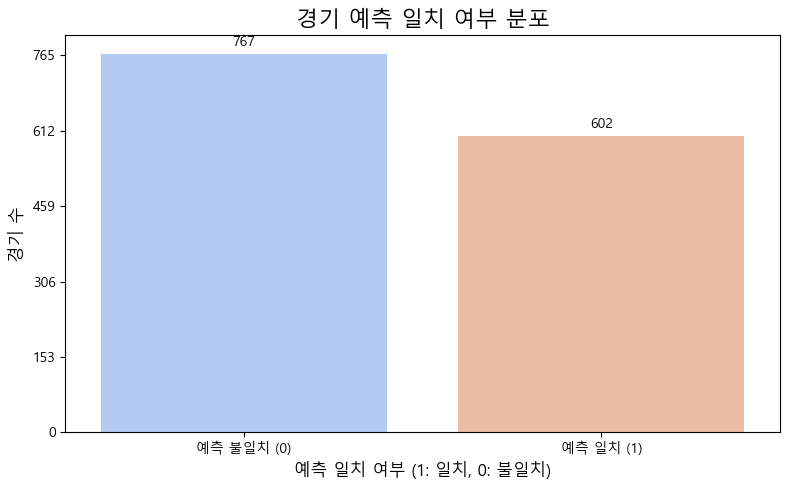

In [58]:
if 'Prediction_Match' in df.columns:
    # 'Prediction_Match' 컬럼의 값(0 또는 1)별 빈도수를 계산합니다.
    match_counts = df['Prediction_Match'].value_counts()

    # 결과를 보기 좋게 정렬합니다 (예: 1(맞음), 0(틀림) 순서로)
    # 인덱스가 0과 1이므로, 0과 1이 모두 있는지 확인하고 순서를 지정합니다.
    order = [1, 0] # 예측이 맞은 경우(1)를 먼저 보여주고, 틀린 경우(0)를 다음에 보여줍니다.
    # reindex를 사용하여 순서를 강제하고, 만약 특정 값이 없으면 NaN으로 채워집니다.
    match_counts = match_counts.reindex(order, fill_value=0)


    # 막대 그래프를 그립니다.
    plt.figure(figsize=(8, 5)) # 그래프 크기 설정
    sns.barplot(x=match_counts.index, y=match_counts.values, palette='coolwarm')

    # 그래프 제목과 축 라벨 설정
    plt.title('경기 예측 일치 여부 분포', fontsize=16)
    plt.xlabel('예측 일치 여부 (1: 일치, 0: 불일치)', fontsize=12)
    plt.ylabel('경기 수', fontsize=12)

    # x축 라벨을 더 명확하게 변경
    plt.xticks([0, 1], ['예측 불일치 (0)', '예측 일치 (1)'], fontsize=10)

    # y축 눈금을 정수형으로 표시
    # 최대값에 여유를 주어 텍스트가 잘 보이도록 합니다.
    plt.yticks(np.arange(0, max(match_counts.values) + max(10, max(match_counts.values) * 0.1), max(50, max(match_counts.values) // 5)))
    plt.ticklabel_format(style='plain', axis='y') # 지수 표기법 방지

    # 각 막대 위에 정확한 경기 수 표시
    for index, value in enumerate(match_counts.values):
        # x축 라벨 순서에 맞춰 인덱스 조정 (reindex로 인해 이미 순서가 맞춰져 있을 수 있음)
        # 여기서는 match_counts.index를 직접 사용합니다.
        plt.text(match_counts.index[index], value + 10, str(value), ha='center', va='bottom', fontsize=10)

    plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
    plt.show() # 그래프 표시

else:
    print("'Prediction_Match' 컬럼이 'basketball_df'에 존재하지 않습니다. 먼저 이 컬럼을 생성해 주세요.")
    print("예시: basketball_df['Prediction_Match'] = (basketball_df['Predicted_Winner'] == basketball_df['Actual_Winner']).astype(int)")



In [46]:
df.head()

,Match_ID,Date,Sport,Home_Team,Away_Team,Home_Team_Odds,Away_Team_Odds,Draw_Odds,Predicted_Winner,Actual_Winner,Home_Team_Odds_Probability,Away_Team_Odds_Probability,Draw_Odds_Probability,Total_Implied_Probability,Prediction_Match
0,M00001,2024-01-24,Basketball,Gonzalezmouth Tigers,Hernandezfurt Lions,3.62,3.99,NaN,Hernandezfurt Lions,Hernandezfurt Lions,0.276243,0.250627,NaN,0.526870,1
1,M00002,2025-05-03,Basketball,Rothstad Wolves,North Manuel Eagles,1.84,NaN,NaN,Rothstad Wolves,Rothstad Wolves,0.543478,NaN,NaN,0.543478,1
2,M00003,2025-04-10,Baseball,Aliciaport Lions,West Gabrielton Lions,3.93,3.29,NaN,Aliciaport Lions,Aliciaport Lions,0.254453,0.303951,NaN,0.558404,1
3,M00004,2024-08-02,Tennis,Lake Samantha Eagles,Simonshire Lions,3.70,3.61,NaN,Simonshire Lions,Lake Samantha Eagles,0.270270,0.277008,NaN,0.547279,0
4,M00005,2024-10-05,Tennis,Brendanport Eagles,Williamsfurt Bears,2.26,2.52,NaN,Williamsfurt Bears,Brendanport Eagles,0.442478,0.396825,NaN,0.839303,0


## 3. 각 스포츠마다 특성 분석

-  각 스포츠의 특성을 고려하여, 모델의 불필요한 노이즈를 줄이고 해당 스포츠에 더 특화된 패턴을 학습

In [47]:
# 'Sport' 컬럼의 모든 고유한 값(스포츠 종목)을 가져옵니다.
# 사용자 요청에 따라 예상되는 5개 스포츠 종목: baseball, basketball, tennis, hockey, football
unique_sports = df['Sport'].unique()

# 각 스포츠 종목별 데이터프레임을 저장할 딕셔너리를 생성합니다.
# 딕셔너리 이름: sport_dataframes
# 키: 스포츠 종목 이름 (예: 'Football', 'Basketball')
# 값: 해당 스포츠 종목의 데이터프레임
sport_dataframes = {}

print("스포츠 종목별 데이터프레임 분류 결과:")
print("-" * 40)

# 각 고유한 스포츠 종목에 대해 반복합니다.
for sport in unique_sports:
    # 현재 스포츠 종목에 해당하는 행들만 필터링하여 새로운 데이터프레임을 생성합니다.
    # .copy()를 사용하여 원본 df의 뷰가 아닌 독립적인 복사본을 만듭니다.
    sport_df = df[df['Sport'] == sport].copy()

    # 생성된 데이터프레임을 딕셔너리에 저장합니다.
    sport_dataframes[sport] = sport_df

    # 분류된 데이터프레임의 정보 출력
    print(f"'{sport}' 데이터프레임 생성 완료. 총 {len(sport_df)}개 경기.")

print("-" * 40)
print("\n이제 'sport_dataframes' 딕셔너리를 통해 각 스포츠 데이터에 접근할 수 있습니다.")
print("예시: 축구 데이터프레임은 sport_dataframes['Football']로 접근")
print("다른 스포츠도 마찬가지입니다: sport_dataframes['Baseball'], sport_dataframes['Basketball'], sport_dataframes['Tennis'], sport_dataframes['Hockey']")

# 예시: 'Football' 데이터프레임에 접근하여 상위 5개 행 출력
# if 'Football' in sport_dataframes:
#     print("\n'Football' 데이터프레임 상위 5개 행:")
#     print(sport_dataframes['Football'].head())

# 예시: 'Baseball' 데이터프레임에 접근하여 상위 5개 행 출력
# if 'Baseball' in sport_dataframes:
#     print("\n'Baseball' 데이터프레임 상위 5개 행:")
#     print(sport_dataframes['Baseball'].head())

# 예시: 모든 스포츠 데이터프레임의 키(이름) 확인
# print("\n분류된 스포츠 데이터프레임 키(이름):")
# print(sport_dataframes.keys())


스포츠 종목별 데이터프레임 분류 결과:
----------------------------------------
'Basketball' 데이터프레임 생성 완료. 총 292개 경기.
'Baseball' 데이터프레임 생성 완료. 총 271개 경기.
'Tennis' 데이터프레임 생성 완료. 총 278개 경기.
'Hockey' 데이터프레임 생성 완료. 총 258개 경기.
'Football' 데이터프레임 생성 완료. 총 270개 경기.
----------------------------------------

이제 'sport_dataframes' 딕셔너리를 통해 각 스포츠 데이터에 접근할 수 있습니다.
예시: 축구 데이터프레임은 sport_dataframes['Football']로 접근
다른 스포츠도 마찬가지입니다: sport_dataframes['Baseball'], sport_dataframes['Basketball'], sport_dataframes['Tennis'], sport_dataframes['Hockey']


In [50]:
print("각 스포츠 리그별 고유 팀 수:")
print("-" * 40)

# 딕셔너리의 각 항목(스포츠 이름, 데이터프레임)에 대해 반복합니다.
for sport, sport_df in sport_dataframes.items():
    # Home_Team과 Away_Team 컬럼의 모든 팀 이름을 하나로 합칩니다.
    all_teams_in_sport = pd.concat([sport_df['Home_Team'], sport_df['Away_Team']]).unique()

    # 중복을 제거한 고유한 팀의 개수를 출력합니다.
    print(f"'{sport}' 리그의 고유 팀 수: {len(all_teams_in_sport)}개")

print("-" * 40)

각 스포츠 리그별 고유 팀 수:
----------------------------------------
'Basketball' 리그의 고유 팀 수: 579개
'Baseball' 리그의 고유 팀 수: 539개
'Tennis' 리그의 고유 팀 수: 553개
'Hockey' 리그의 고유 팀 수: 510개
'Football' 리그의 고유 팀 수: 538개
----------------------------------------


In [49]:
print("다른 스포츠 종목에 같은 이름의 팀이 있는지 확인:")
print("-" * 60)

# 1. 모든 Home_Team과 Away_Team 이름을 하나의 시리즈로 합칩니다.
all_teams = pd.concat([df['Home_Team'], df['Away_Team']])

# 2. 각 팀 이름이 어떤 스포츠에 속하는지 매핑할 데이터프레임을 만듭니다.
# (팀 이름, 스포츠) 쌍을 포함하는 임시 데이터프레임 생성
team_sport_mapping_df = df[['Home_Team', 'Sport']].rename(columns={'Home_Team': 'Team_Name'})
team_sport_mapping_df = pd.concat([team_sport_mapping_df, df[['Away_Team', 'Sport']].rename(columns={'Away_Team': 'Team_Name'})])

# 3. 각 팀 이름별로 어떤 스포츠에 등장하는지 고유한 스포츠 목록을 만듭니다.
# Team_Name을 기준으로 그룹화하고, Sport 컬럼의 고유값을 리스트로 만듭니다.
team_sports_occurrences = team_sport_mapping_df.groupby('Team_Name')['Sport'].unique()

# 4. 고유한 스포츠 목록의 길이가 1보다 큰 (즉, 여러 스포츠에 걸쳐 나타나는) 팀을 찾습니다.
teams_in_multiple_sports = team_sports_occurrences[team_sports_occurrences.apply(len) > 1]

if not teams_in_multiple_sports.empty:
    print("다음 팀들이 여러 스포츠 종목에 걸쳐 같은 이름으로 존재합니다:")
    for team_name, sports_list in teams_in_multiple_sports.items():
        print(f"- 팀 이름: '{team_name}', 나타나는 스포츠 종목: {', '.join(sports_list)}")
else:
    print("다른 스포츠 종목에 같은 이름으로 존재하는 팀은 없습니다.")

print("-" * 60)

다른 스포츠 종목에 같은 이름의 팀이 있는지 확인:
------------------------------------------------------------
다음 팀들이 여러 스포츠 종목에 걸쳐 같은 이름으로 존재합니다:
- 팀 이름: 'Alanbury Tigers', 나타나는 스포츠 종목: Basketball, Hockey
- 팀 이름: 'Allenville Lions', 나타나는 스포츠 종목: Hockey, Basketball
- 팀 이름: 'Amandaburgh Tigers', 나타나는 스포츠 종목: Football, Tennis
- 팀 이름: 'Angelafort Eagles', 나타나는 스포츠 종목: Hockey, Tennis
- 팀 이름: 'Brianmouth Tigers', 나타나는 스포츠 종목: Baseball, Basketball
- 팀 이름: 'Connieside Bears', 나타나는 스포츠 종목: Football, Tennis
- 팀 이름: 'East Amanda Eagles', 나타나는 스포츠 종목: Football, Tennis
- 팀 이름: 'East James Eagles', 나타나는 스포츠 종목: Tennis, Hockey
- 팀 이름: 'East Josephborough Tigers', 나타나는 스포츠 종목: Tennis, Football
- 팀 이름: 'East Williamborough Bears', 나타나는 스포츠 종목: Tennis, Basketball
- 팀 이름: 'Guzmanfurt Tigers', 나타나는 스포츠 종목: Tennis, Football
- 팀 이름: 'Heatherberg Wolves', 나타나는 스포츠 종목: Tennis, Football
- 팀 이름: 'Heidimouth Tigers', 나타나는 스포츠 종목: Hockey, Basketball
- 팀 이름: 'Jennifershire Wolves', 나타나는 스포츠 종목: Basketball, Baseball
- 팀 이름: 'Jessicato

### 3.1. Basketball

In [51]:
basketball_df=sport_dataframes['Basketball']

In [52]:
basketball_df.head()

,Match_ID,Date,Sport,Home_Team,Away_Team,Home_Team_Odds,Away_Team_Odds,Draw_Odds,Predicted_Winner,Actual_Winner,Home_Team_Odds_Probability,Away_Team_Odds_Probability,Draw_Odds_Probability,Total_Implied_Probability,Prediction_Match
0,M00001,2024-01-24,Basketball,Gonzalezmouth Tigers,Hernandezfurt Lions,3.62,3.99,NaN,Hernandezfurt Lions,Hernandezfurt Lions,0.276243,0.250627,NaN,0.526870,1
1,M00002,2025-05-03,Basketball,Rothstad Wolves,North Manuel Eagles,1.84,NaN,NaN,Rothstad Wolves,Rothstad Wolves,0.543478,NaN,NaN,0.543478,1
5,M00006,2024-01-05,Basketball,Jacobchester Tigers,Stevenside Lions,2.65,2.37,NaN,Jacobchester Tigers,Jacobchester Tigers,0.377358,0.421941,NaN,0.799299,1
9,M00010,2025-02-24,Basketball,Brownfurt Eagles,West Paul Eagles,4.65,4.32,NaN,Brownfurt Eagles,West Paul Eagles,0.215054,0.231481,NaN,0.446535,0
10,M00011,2025-01-01,Basketball,New Kathy Tigers,West Melvin Lions,4.89,4.15,NaN,West Melvin Lions,New Kathy Tigers,0.204499,0.240964,NaN,0.445463,0


In [53]:
basketball_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 0 to 1368
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Match_ID                    292 non-null    object 
 1   Date                        292 non-null    object 
 2   Sport                       292 non-null    object 
 3   Home_Team                   292 non-null    object 
 4   Away_Team                   292 non-null    object 
 5   Home_Team_Odds              280 non-null    float64
 6   Away_Team_Odds              274 non-null    float64
 7   Draw_Odds                   0 non-null      float64
 8   Predicted_Winner            292 non-null    object 
 9   Actual_Winner               292 non-null    object 
 10  Home_Team_Odds_Probability  280 non-null    float64
 11  Away_Team_Odds_Probability  274 non-null    float64
 12  Draw_Odds_Probability       0 non-null      float64
 13  Total_Implied_Probability   292 non-nul

In [54]:
basketball_df.describe()

,Home_Team_Odds,Away_Team_Odds,Draw_Odds,Home_Team_Odds_Probability,Away_Team_Odds_Probability,Draw_Odds_Probability,Total_Implied_Probability,Prediction_Match
count,280.000000,274.000000,0.0,280.000000,274.000000,0.0,292.000000,292.000000
mean,3.107036,3.057956,NaN,0.372336,0.381422,NaN,0.714945,0.517123
std,1.070156,1.092889,NaN,0.157235,0.162470,NaN,0.255074,0.500565
min,1.200000,1.210000,NaN,0.200803,0.201613,NaN,0.000000,0.000000
25%,2.140000,2.135000,NaN,0.249377,0.246305,NaN,0.543476,0.000000
50%,3.115000,3.050000,NaN,0.321028,0.327869,NaN,0.689270,1.000000
75%,4.010000,4.060000,NaN,0.467290,0.468392,NaN,0.878643,1.000000
max,4.980000,4.960000,NaN,0.833333,0.826446,NaN,1.569810,1.000000


In [55]:
basketball_df['Actual_Winner'].value_counts()

Actual_Winner
Christopherside Wolves     2
Jacobchester Tigers        1
West Michael Bears         1
New Allen Tigers           1
South Michael Lions        1
                          ..
Kimburgh Bears             1
West Sandraville Eagles    1
Wardmouth Bears            1
North Kristentown Lions    1
Rothstad Wolves            1
Name: count, Length: 291, dtype: int64

array([[<Axes: title={'center': 'Home_Team_Odds'}>,
        <Axes: title={'center': 'Away_Team_Odds'}>]], dtype=object)

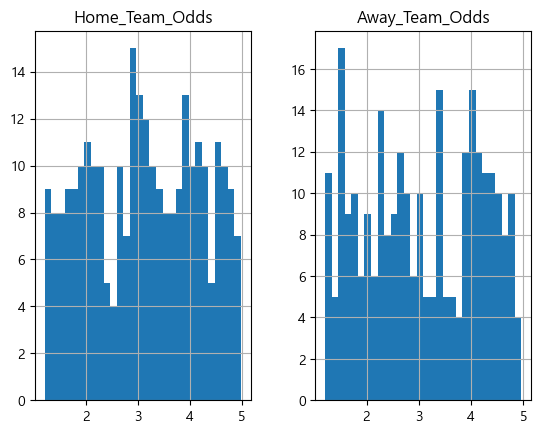

In [56]:
basketball_df[['Home_Team_Odds', 'Away_Team_Odds']].hist(bins=30)

C:\Users\luke\AppData\Local\Temp\ipykernel_50220\1913145484.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_counts.index, y=match_counts.values, palette='coolwarm')


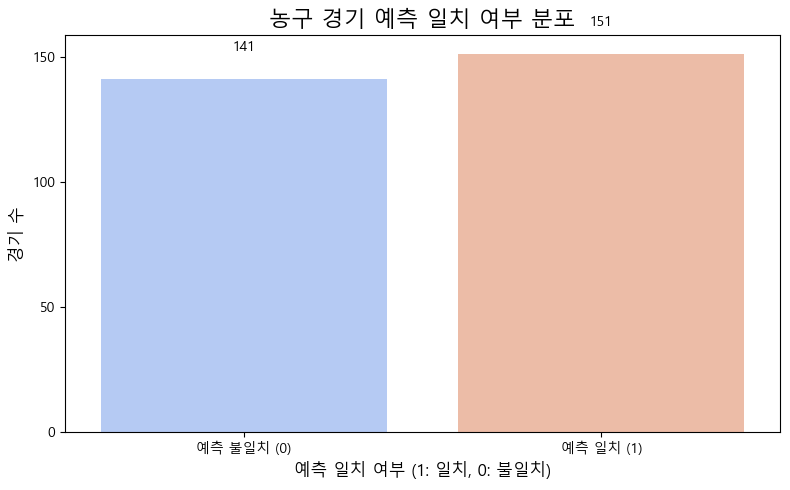

In [57]:
if 'Prediction_Match' in basketball_df.columns:
    # 'Prediction_Match' 컬럼의 값(0 또는 1)별 빈도수를 계산합니다.
    match_counts = basketball_df['Prediction_Match'].value_counts()

    # 결과를 보기 좋게 정렬합니다 (예: 1(맞음), 0(틀림) 순서로)
    # 인덱스가 0과 1이므로, 0과 1이 모두 있는지 확인하고 순서를 지정합니다.
    order = [1, 0] # 예측이 맞은 경우(1)를 먼저 보여주고, 틀린 경우(0)를 다음에 보여줍니다.
    # reindex를 사용하여 순서를 강제하고, 만약 특정 값이 없으면 NaN으로 채워집니다.
    match_counts = match_counts.reindex(order, fill_value=0)


    # 막대 그래프를 그립니다.
    plt.figure(figsize=(8, 5)) # 그래프 크기 설정
    sns.barplot(x=match_counts.index, y=match_counts.values, palette='coolwarm')

    # 그래프 제목과 축 라벨 설정
    plt.title('농구 경기 예측 일치 여부 분포', fontsize=16)
    plt.xlabel('예측 일치 여부 (1: 일치, 0: 불일치)', fontsize=12)
    plt.ylabel('경기 수', fontsize=12)

    # x축 라벨을 더 명확하게 변경
    plt.xticks([0, 1], ['예측 불일치 (0)', '예측 일치 (1)'], fontsize=10)

    # y축 눈금을 정수형으로 표시
    # 최대값에 여유를 주어 텍스트가 잘 보이도록 합니다.
    plt.yticks(np.arange(0, max(match_counts.values) + max(10, max(match_counts.values) * 0.1), max(50, max(match_counts.values) // 5)))
    plt.ticklabel_format(style='plain', axis='y') # 지수 표기법 방지

    # 각 막대 위에 정확한 경기 수 표시
    for index, value in enumerate(match_counts.values):
        # x축 라벨 순서에 맞춰 인덱스 조정 (reindex로 인해 이미 순서가 맞춰져 있을 수 있음)
        # 여기서는 match_counts.index를 직접 사용합니다.
        plt.text(match_counts.index[index], value + 10, str(value), ha='center', va='bottom', fontsize=10)

    plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
    plt.show() # 그래프 표시

else:
    print("'Prediction_Match' 컬럼이 'basketball_df'에 존재하지 않습니다. 먼저 이 컬럼을 생성해 주세요.")
    print("예시: basketball_df['Prediction_Match'] = (basketball_df['Predicted_Winner'] == basketball_df['Actual_Winner']).astype(int)")



basketballl_df 라는 데이터셋을 분석할거야. 먼저, Prediction_Match 컬럼을 활용해, 이 컬럼에 담긴 정보는, 예측 승리팀과 실제 승리팀이 맞는지 아닌지가 적혀있어. 일치하면 1, 불일치하면 0 이야. 

In [59]:
# Prediction_Match, Predicted_Winner, Home_Team_Odds, Away_Team_Odds 컬럼이 필수입니다.

if all(col in basketball_df.columns for col in ['Prediction_Match', 'Predicted_Winner', 'Home_Team_Odds', 'Away_Team_Odds']):
    # 1. '예측된 승리팀의 배당률' 컬럼 생성
    # Predicted_Winner가 'Home'이면 Home_Team_Odds를, 'Away'이면 Away_Team_Odds를 가져옵니다.
    def get_predicted_winner_odds(row):
        if row['Predicted_Winner'] == 'Home':
            return row['Home_Team_Odds']
        elif row['Predicted_Winner'] == 'Away':
            return row['Away_Team_Odds']
        else: # 무승부 예측의 경우 (농구에는 없지만, 안전을 위해 처리)
            return np.nan

    basketball_df['Predicted_Winner_Odds'] = basketball_df.apply(get_predicted_winner_odds, axis=1)

    # 2. 배당률을 여러 구간으로 나눕니다.
    # 예: 1.0~1.5, 1.5~2.0, ... 와 같이 0.5 단위로 구간을 설정합니다.
    bins = np.arange(1.0, basketball_df['Predicted_Winner_Odds'].max() + 0.5, 0.5)
    labels = [f'{i}-{i+0.5}' for i in np.arange(1.0, basketball_df['Predicted_Winner_Odds'].max(), 0.5)]

    # pd.cut 함수를 사용하여 배당률을 구간별로 분류합니다.
    basketball_df['Odds_Group'] = pd.cut(basketball_df['Predicted_Winner_Odds'], bins=bins, labels=labels, right=False)

    # 3. 각 배당률 구간별 예측 정확도를 계산합니다.
    # Odds_Group별로 Prediction_Match의 평균을 구합니다.
    accuracy_by_odds = basketball_df.groupby('Odds_Group')['Prediction_Match'].mean().reset_index()
    accuracy_by_odds['Prediction_Match'] = accuracy_by_odds['Prediction_Match'] * 100 # 백분율로 변환

    # 4. 시각화
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=accuracy_by_odds,
        x='Odds_Group',
        y='Prediction_Match',
        palette='viridis'
    )
    plt.title('배당률 구간별 농구 경기 예측 정확도', fontsize=16)
    plt.xlabel('예측된 승리팀 배당률 구간', fontsize=12)
    plt.ylabel('예측 정확도 (%)', fontsize=12)
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')

    # 각 막대 위에 정확도 수치 표시
    for index, row in accuracy_by_odds.iterrows():
        plt.text(
            index,
            row['Prediction_Match'] + 2,
            f"{row['Prediction_Match']:.2f}%",
            ha='center',
            va='bottom',
            fontsize=10
        )

    plt.tight_layout()
    plt.show()

else:
    print("필수 컬럼이 'basketball_df'에 존재하지 않습니다. 다음 컬럼이 모두 있어야 합니다:")
    print("['Prediction_Match', 'Predicted_Winner', 'Home_Team_Odds', 'Away_Team_Odds']")

ValueError: arange: cannot compute length